Objective: Predict the power generated (in Joules) based on various environmental factors.

In [1]:
#import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xgb


In [2]:
# Import the dataset
df=pd.read_csv('solarpowergeneration.csv')
df

distance-to-solar-noon  temperature  wind-direction  wind-speed  \
0                   0.859897           69              28         7.5   
1                   0.628535           69              28         7.5   
2                   0.397172           69              28         7.5   
3                   0.165810           69              28         7.5   
4                   0.065553           69              28         7.5   
...                      ...          ...             ...         ...   
2915                0.166453           63              27        13.9   
2916                0.064020           63              27        13.9   
2917                0.294494           63              27        13.9   
2918                0.524968           63              27        13.9   
2919                0.755442           63              27        13.9   

      sky-cover  visibility  humidity  average-wind-speed-(period)  \
0             0        10.0        75                          8.0   
1             0        10.0        77                          5.0   
2             0        10.0        70                          0.0   
3             0        10.0        33                          0.0   
4             0        10.0        21                          3.0   
...         ...         ...       ...                          ...   
2915          4        10.0        75                         10.0   
2916          1        10.0        66                         15.0   
2917          2        10.0        68                         21.0   
2918          2        10.0        81                         17.0   
2919          1        10.0        81                         11.0   

      average-pressure-(period)  power-generated  
0                         29.82                0  
1                         29.85                0  
2                         29.89             5418  
3                         29.91            25477  
4                         29.89            30069  
...                         ...              ...  
2915                      29.93             6995  
2916                      29.91            29490  
2917                      29.88            17257  
2918                      29.87              677  
2919                      29.90                0  

[2920 rows x 10 columns]

EDA

In [3]:
df.shape

(2920, 10)

In [4]:
df.info() #number of non-null entries, data type of each column, and memory usage.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2920 entries, 0 to 2919
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   distance-to-solar-noon       2920 non-null   float64
 1   temperature                  2920 non-null   int64  
 2   wind-direction               2920 non-null   int64  
 3   wind-speed                   2920 non-null   float64
 4   sky-cover                    2920 non-null   int64  
 5   visibility                   2920 non-null   float64
 6   humidity                     2920 non-null   int64  
 7   average-wind-speed-(period)  2919 non-null   float64
 8   average-pressure-(period)    2920 non-null   float64
 9   power-generated              2920 non-null   int64  
dtypes: float64(5), int64(5)
memory usage: 228.3 KB


In [5]:
df.isnull().sum() #Checking null values

distance-to-solar-noon         0
temperature                    0
wind-direction                 0
wind-speed                     0
sky-cover                      0
visibility                     0
humidity                       0
average-wind-speed-(period)    1
average-pressure-(period)      0
power-generated                0
dtype: int64

In [6]:
#as there is one null value in 'average-wind-speed-(period)' column, let's replace it with median
df.fillna(value=df['average-wind-speed-(period)'].median(),inplace=True)
df.isnull().sum()  #Verifying null values after replacing 

distance-to-solar-noon         0
temperature                    0
wind-direction                 0
wind-speed                     0
sky-cover                      0
visibility                     0
humidity                       0
average-wind-speed-(period)    0
average-pressure-(period)      0
power-generated                0
dtype: int64

In [7]:
df.nunique()

distance-to-solar-noon         2660
temperature                      37
wind-direction                   35
wind-speed                      159
sky-cover                         5
visibility                       17
humidity                         75
average-wind-speed-(period)      32
average-pressure-(period)        90
power-generated                1529
dtype: int64

In [8]:
df.duplicated().sum()

0

In [9]:
df.describe() #Summary statistics

distance-to-solar-noon  temperature  wind-direction   wind-speed  \
count             2920.000000  2920.000000     2920.000000  2920.000000   
mean                 0.503294    58.468493       24.953425    10.096986   
std                  0.298024     6.841200        6.915178     4.838185   
min                  0.050401    42.000000        1.000000     1.100000   
25%                  0.243714    53.000000       25.000000     6.600000   
50%                  0.478957    59.000000       27.000000    10.000000   
75%                  0.739528    63.000000       29.000000    13.100000   
max                  1.141361    78.000000       36.000000    26.600000   

         sky-cover   visibility     humidity  average-wind-speed-(period)  \
count  2920.000000  2920.000000  2920.000000                  2920.000000   
mean      1.987671     9.557705    73.513699                    10.128767   
std       1.411978     1.383884    15.077139                     7.260333   
min       0.000000     0.000000    14.000000                     0.000000   
25%       1.000000    10.000000    65.000000                     5.000000   
50%       2.000000    10.000000    77.000000                     9.000000   
75%       3.000000    10.000000    84.000000                    15.000000   
max       4.000000    10.000000   100.000000                    40.000000   

       average-pressure-(period)  power-generated  
count                2920.000000      2920.000000  
mean                   30.017760      6979.846233  
std                     0.142006     10312.336413  
min                    29.480000         0.000000  
25%                    29.920000         0.000000  
50%                    30.000000       404.000000  
75%                    30.110000     12723.500000  
max                    30.530000     36580.000000

distance-to-solar-noon         0.211452
temperature                    0.125916
wind-direction                -1.629519
wind-speed                     0.416851
sky-cover                      0.080284
visibility                    -3.862446
humidity                      -0.955607
average-wind-speed-(period)    0.623168
average-pressure-(period)      0.441384
power-generated                1.307035
dtype: float64

<Figure size 1200x600 with 0 Axes>

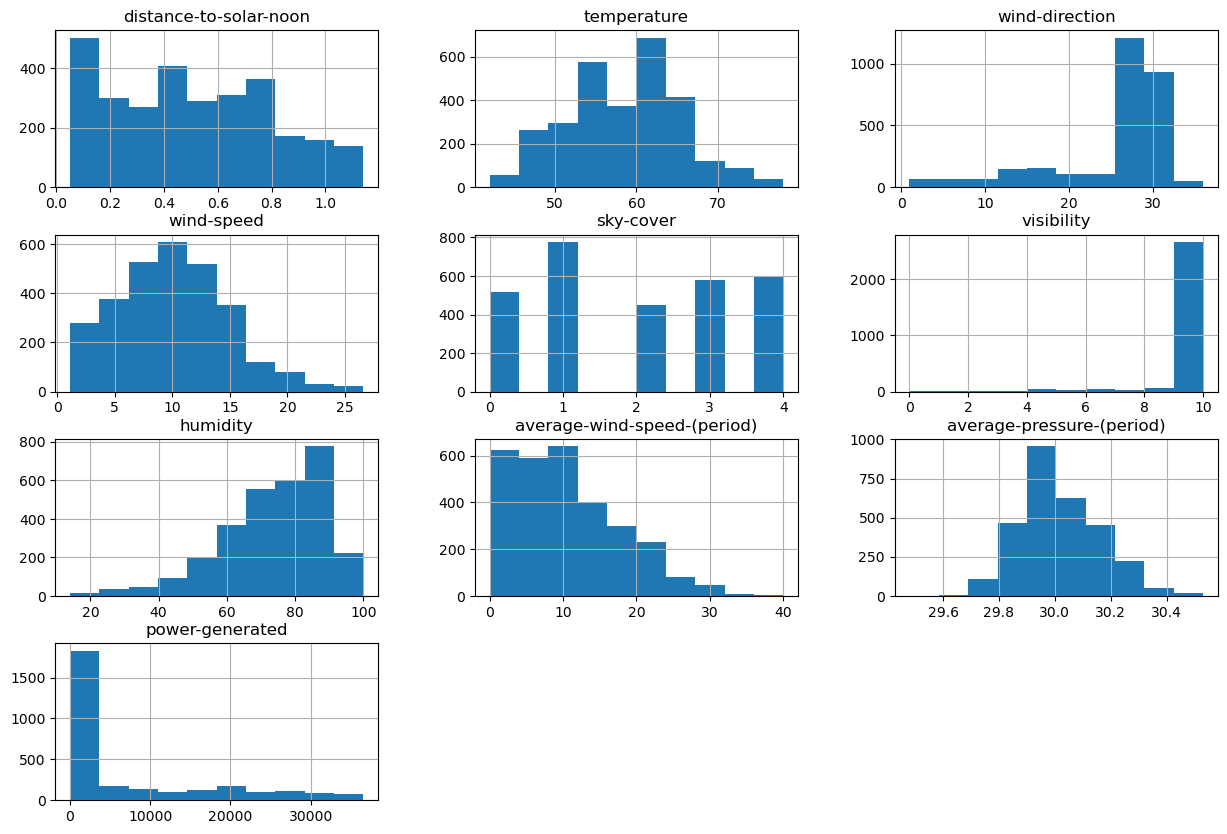

In [10]:
# histogram
plt.figure(figsize=(12, 6))
df.hist(figsize=(15,10))
df.skew()

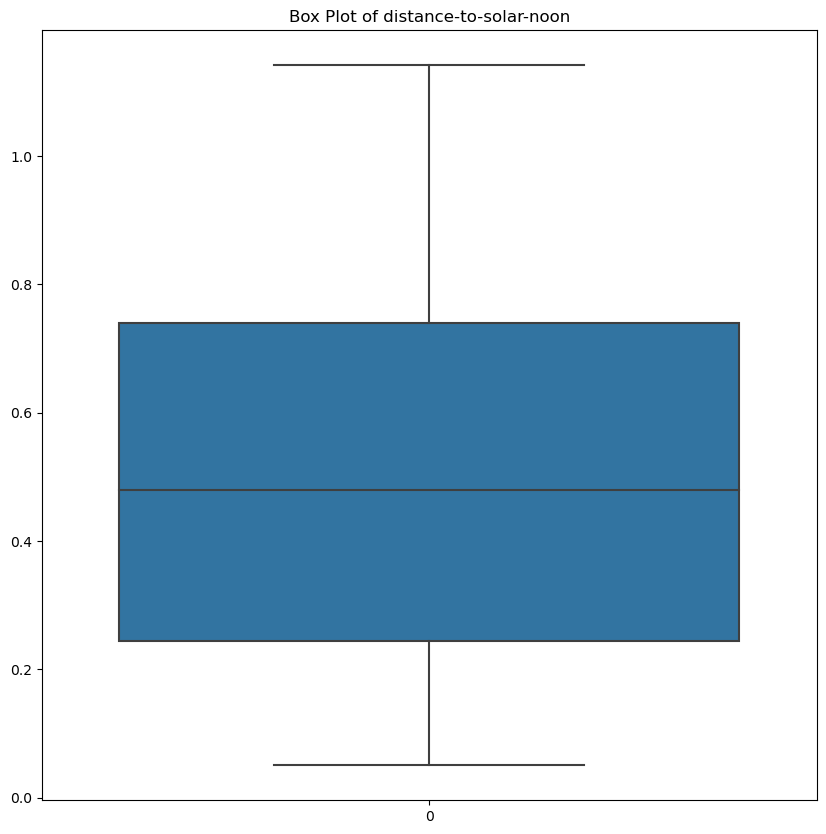

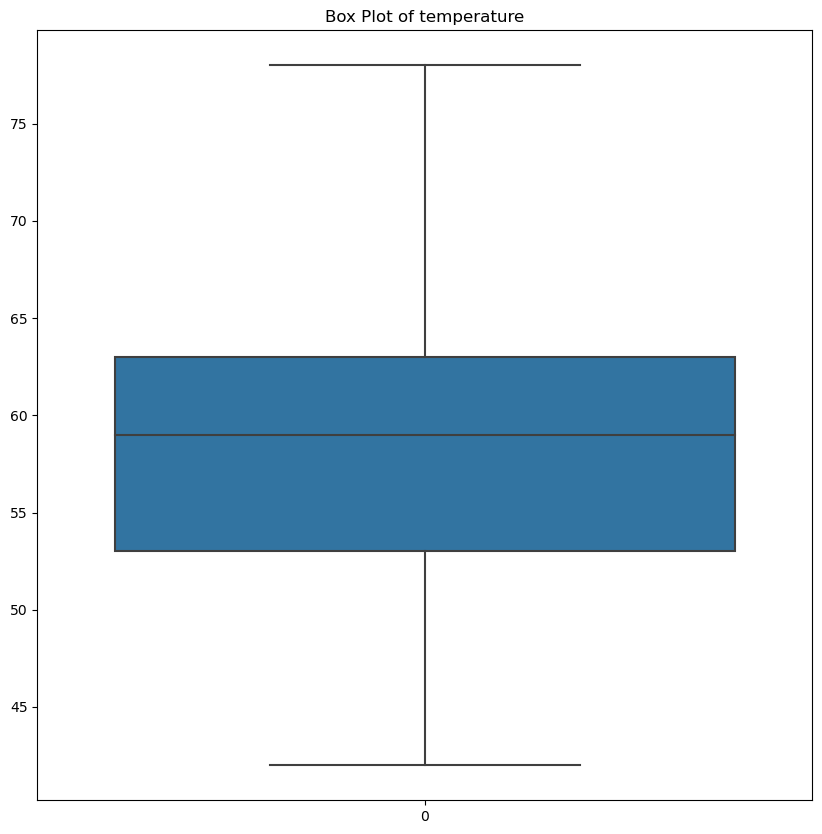

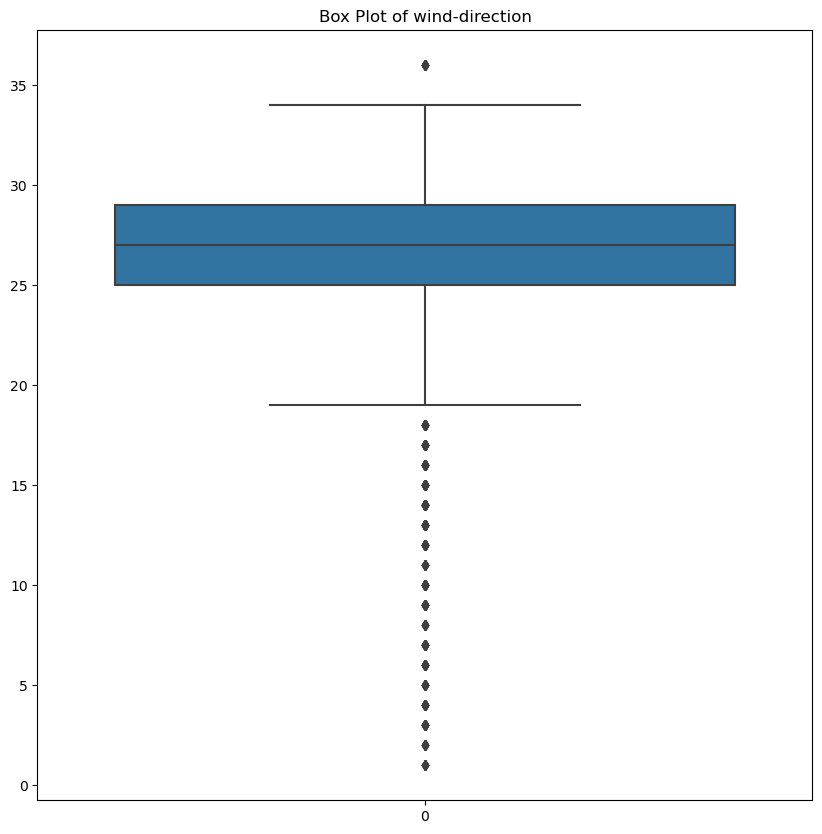

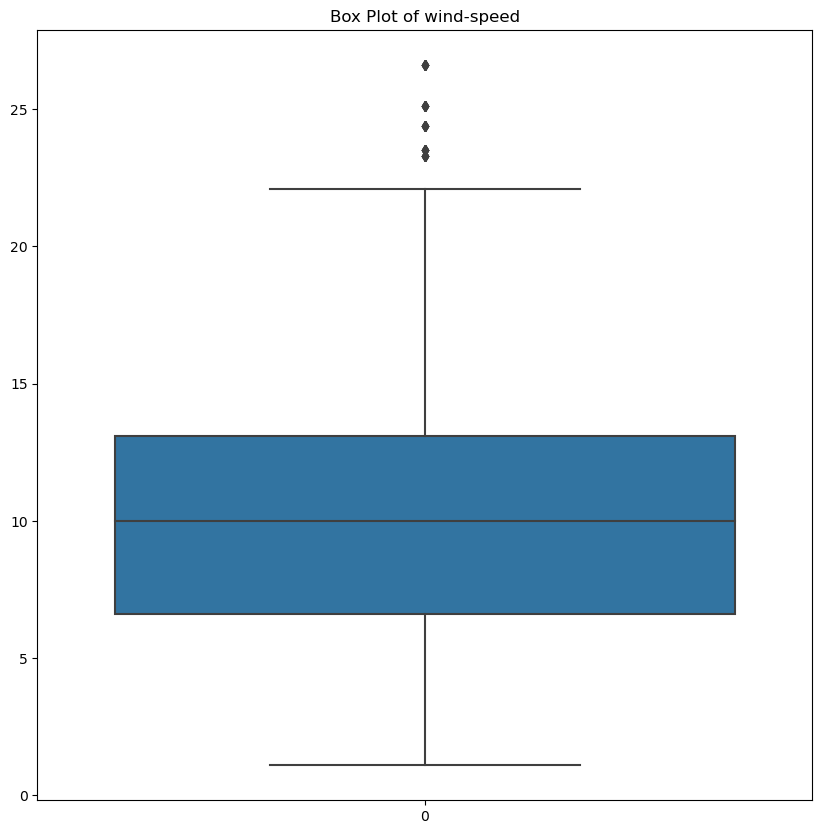

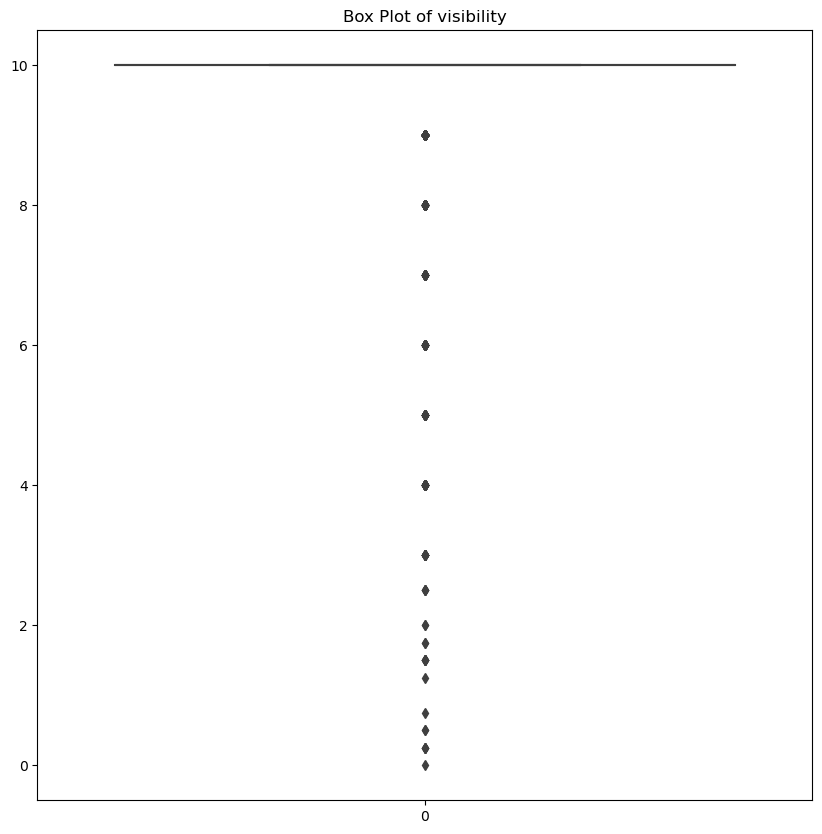

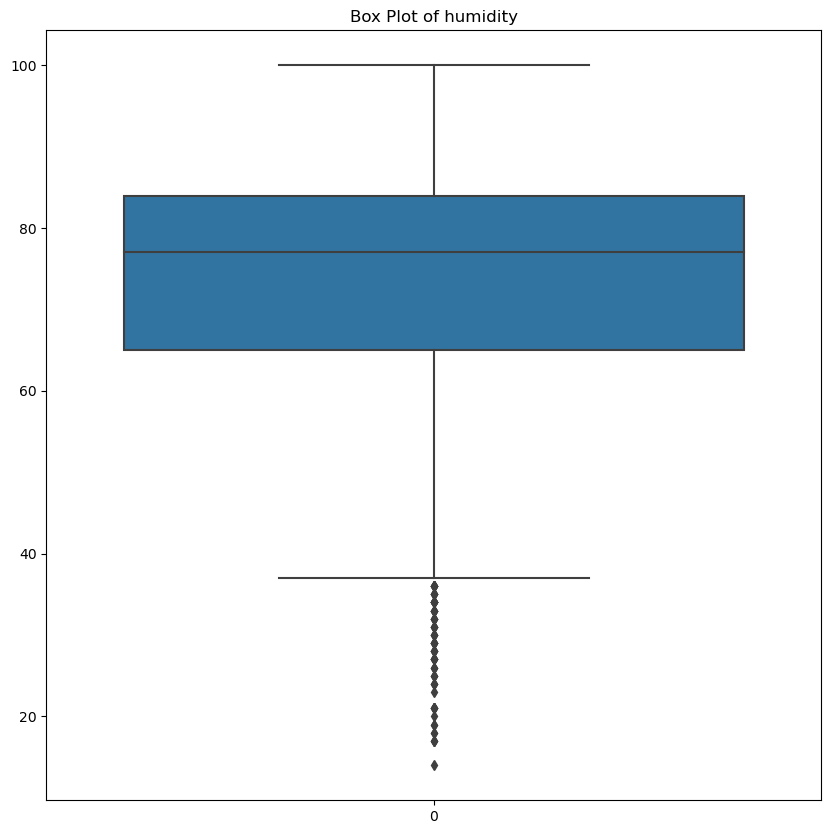

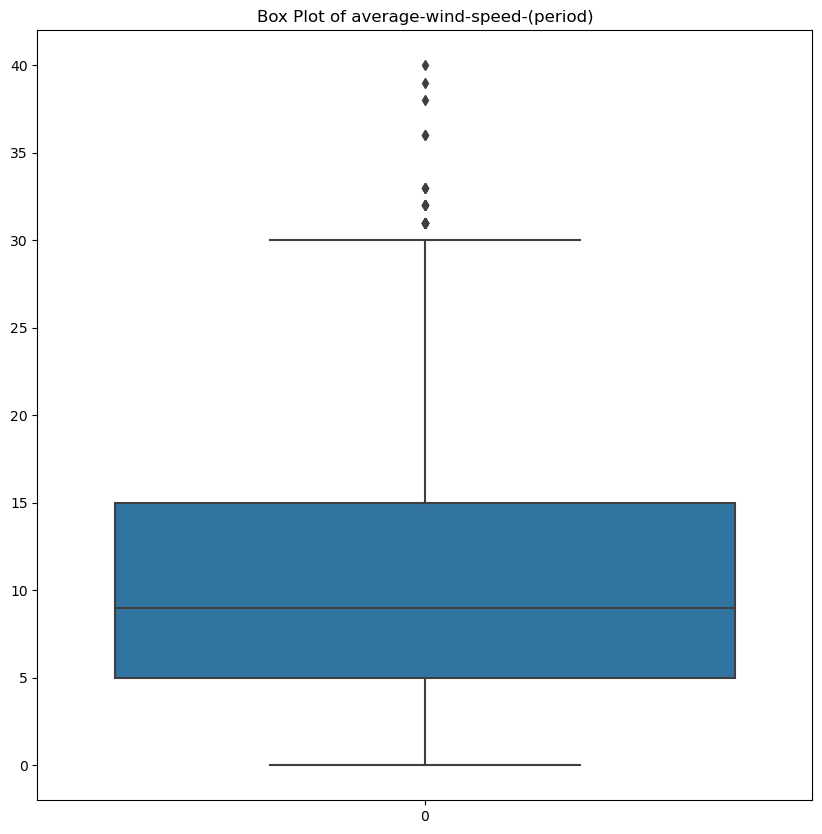

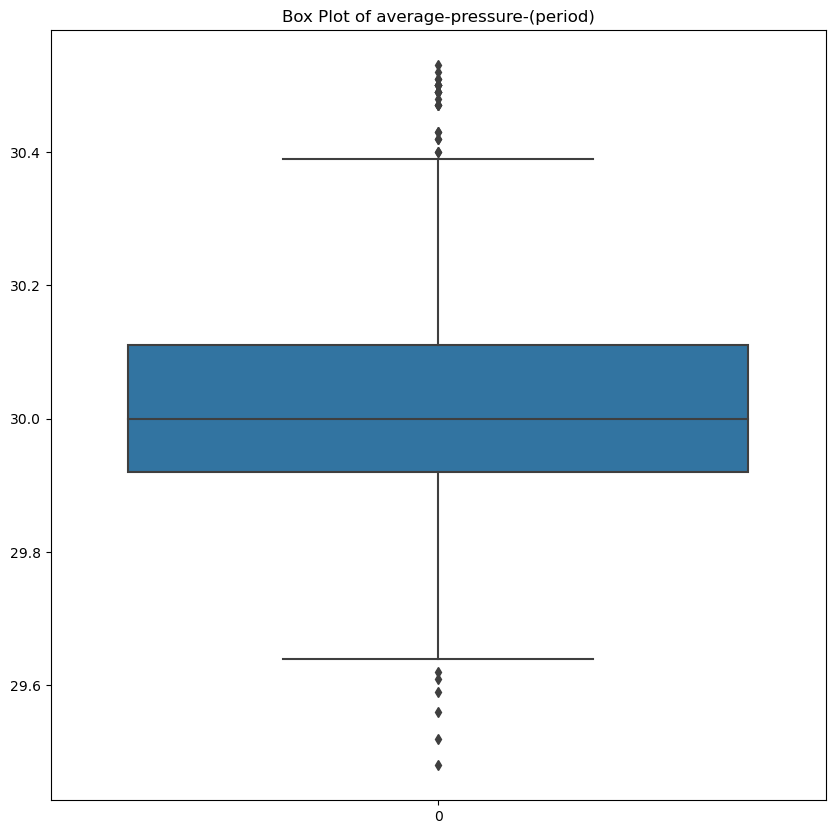

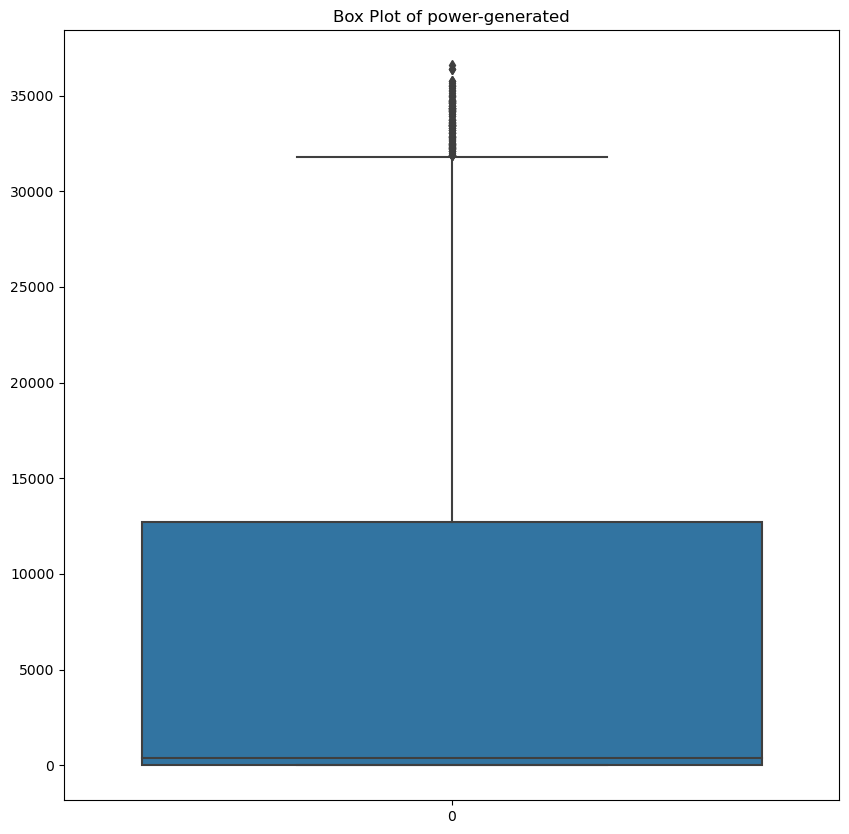

In [11]:
#box plot
for column in df.columns:
  if column != 'sky-cover':
    plt.figure(figsize=(10, 10))
    sns.boxplot(df[column])
    plt.title(f"Box Plot of {column}")
    plt.show()


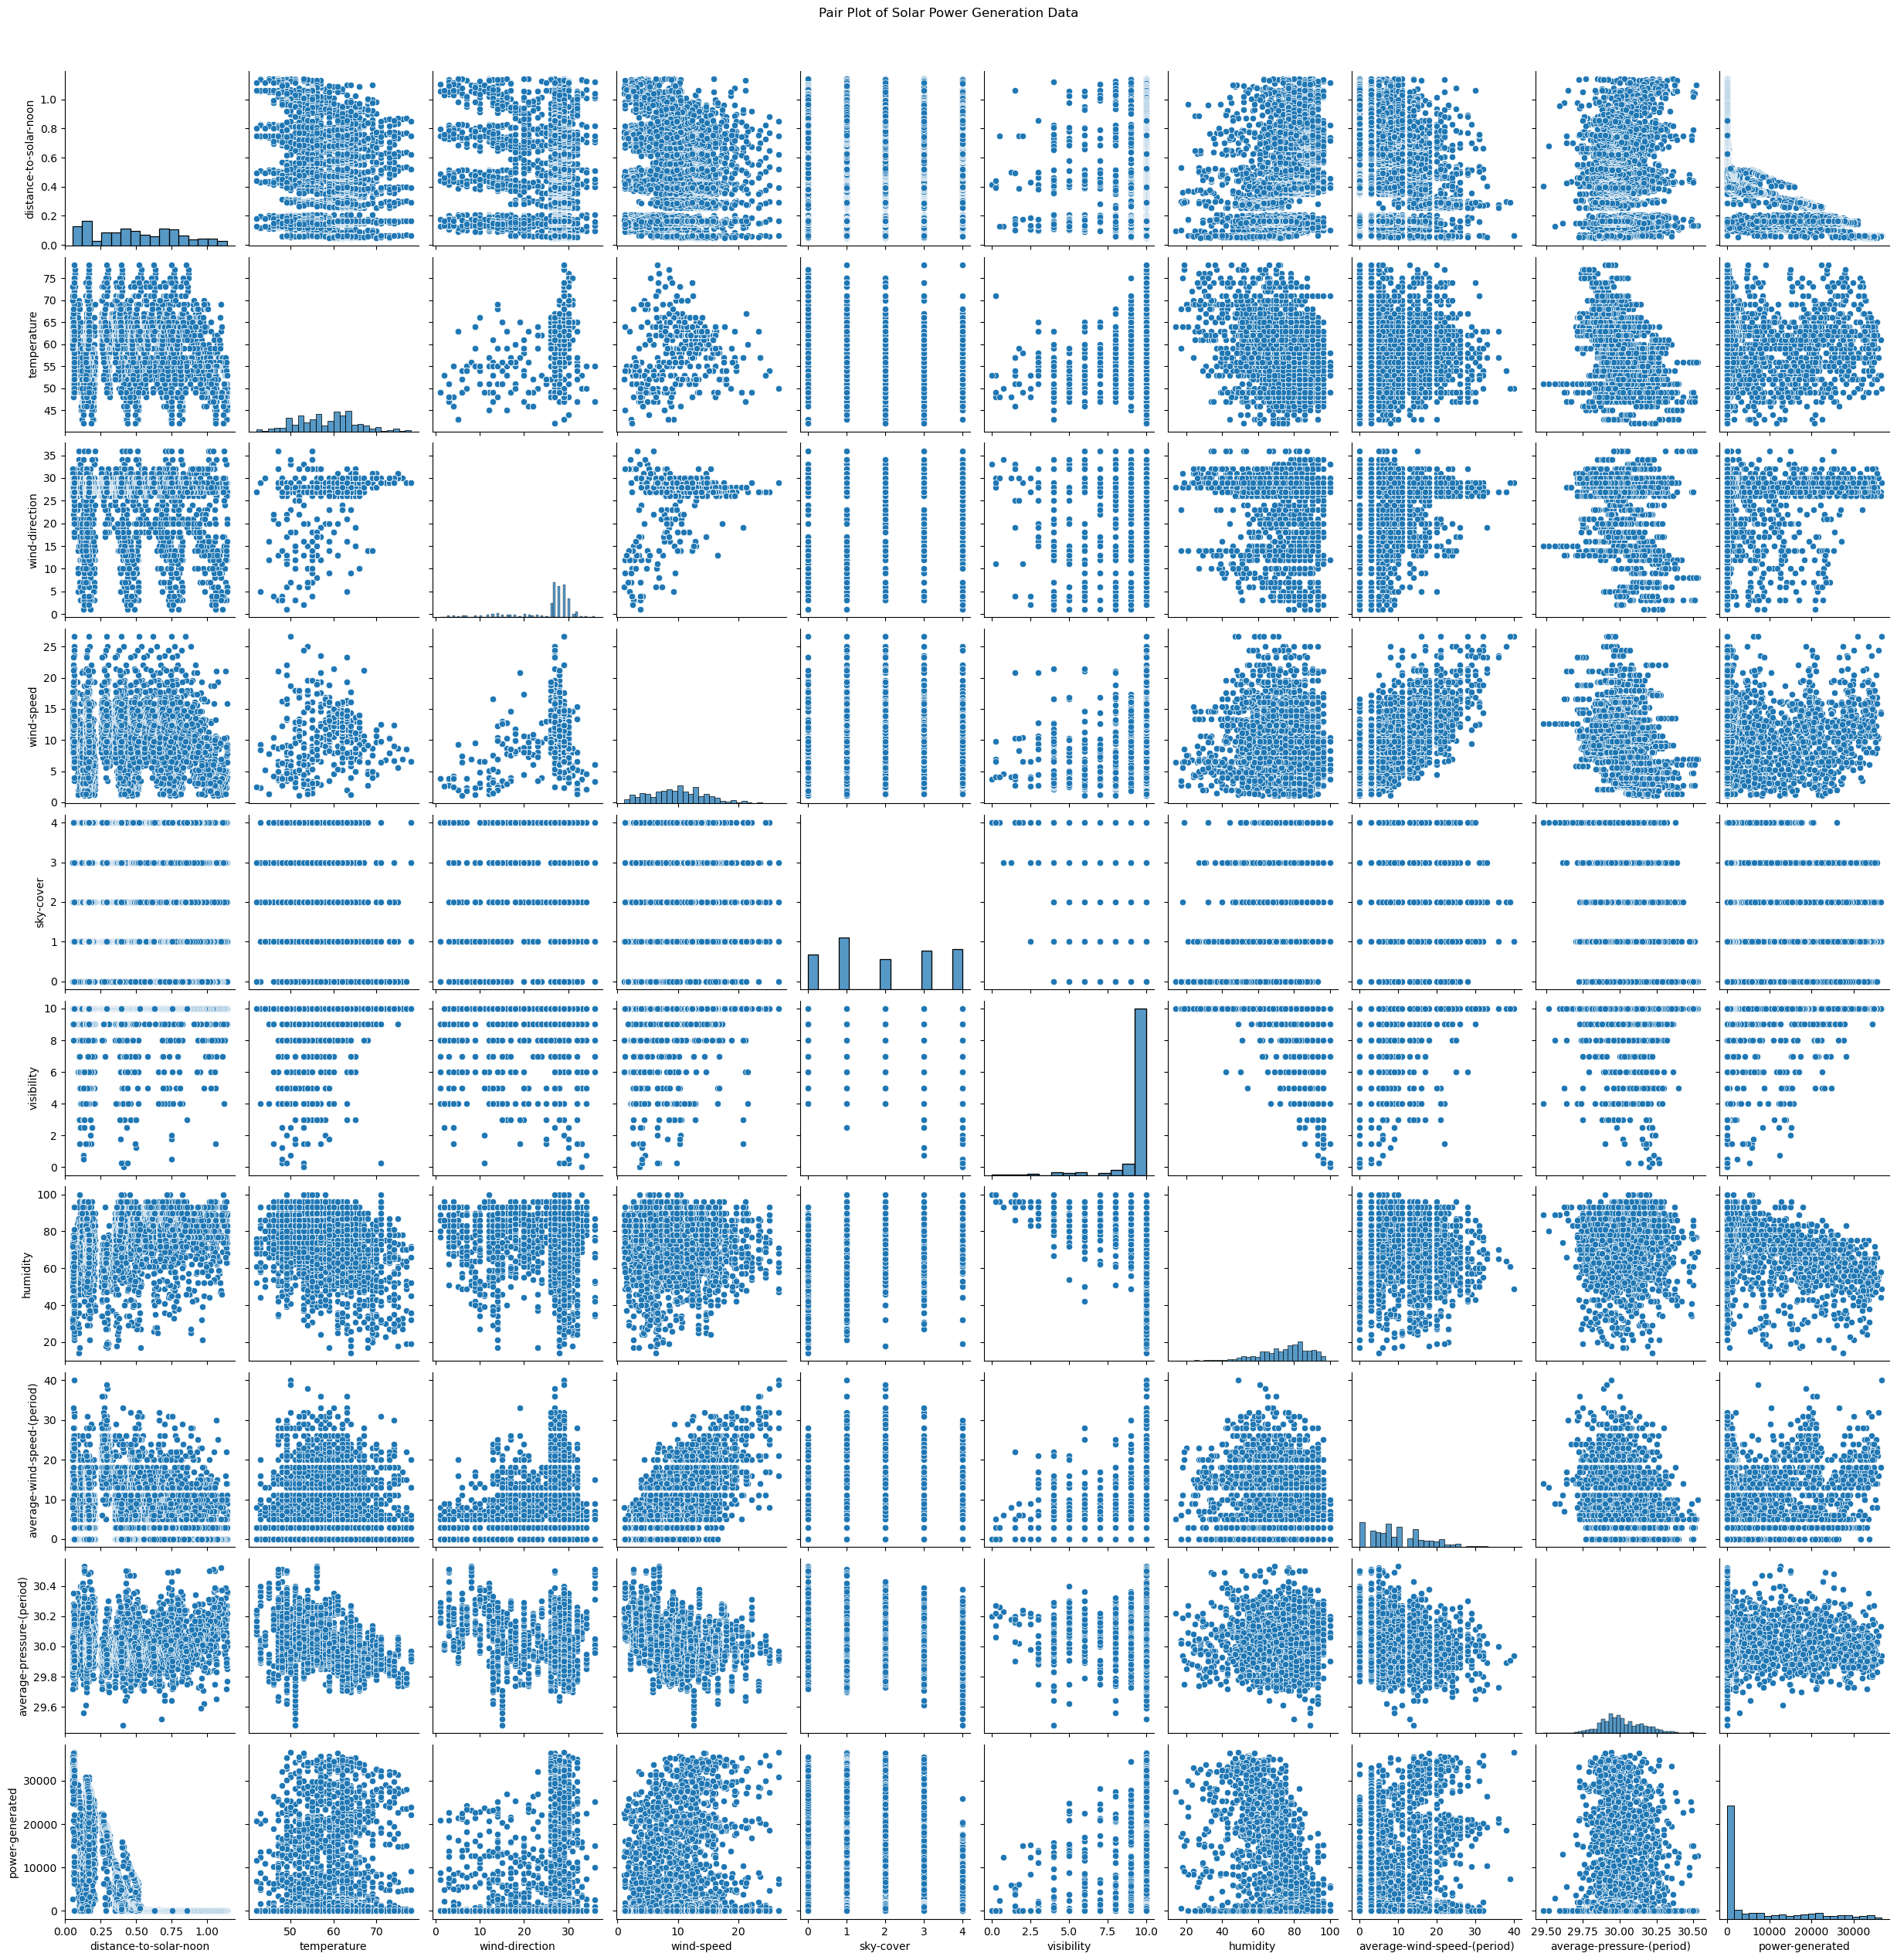

In [12]:
# Generate a pair plot
sns.pairplot(df)
plt.suptitle('Pair Plot of Solar Power Generation Data', y=1.02)
plt.show()


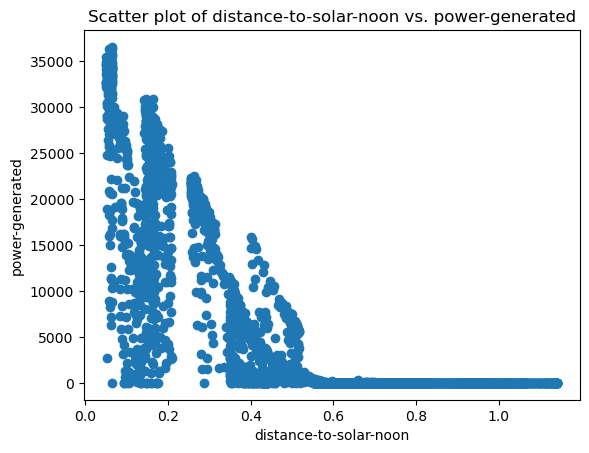

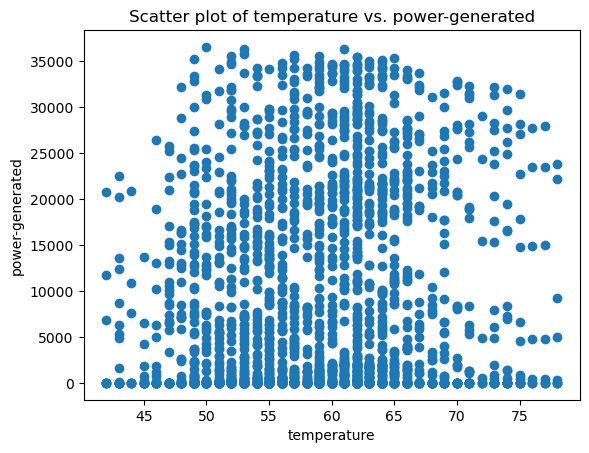

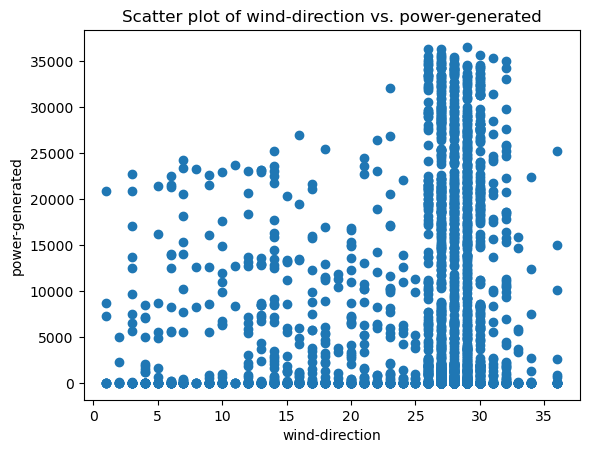

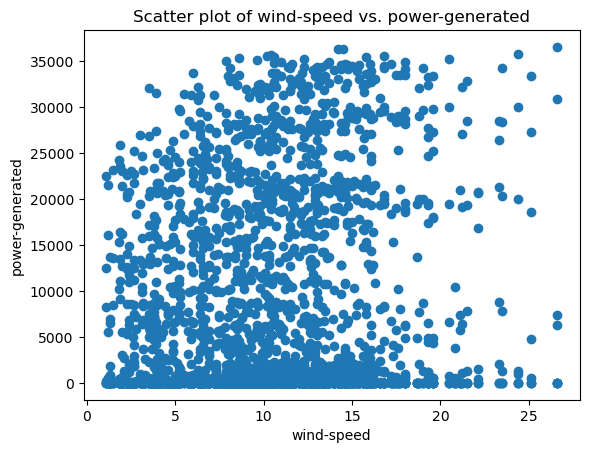

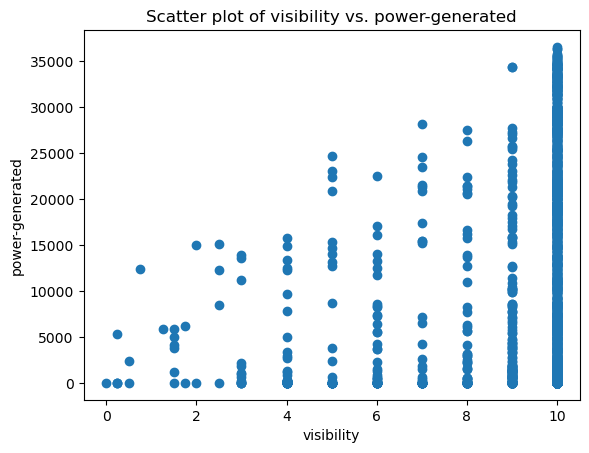

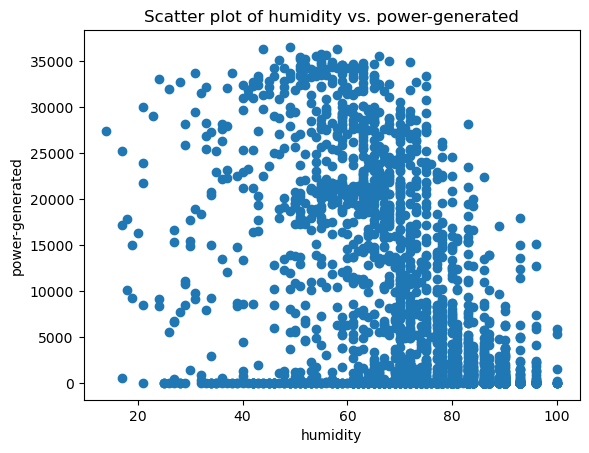

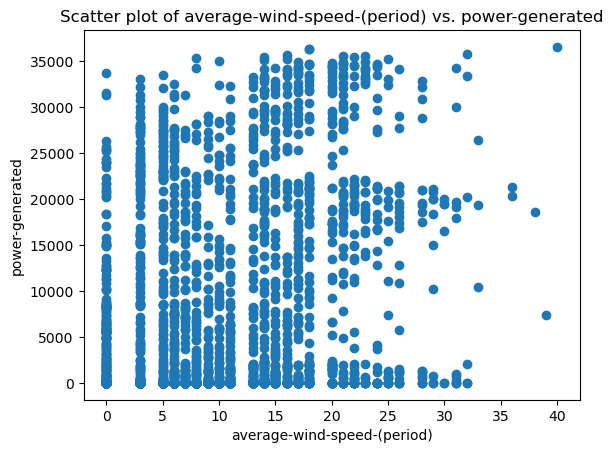

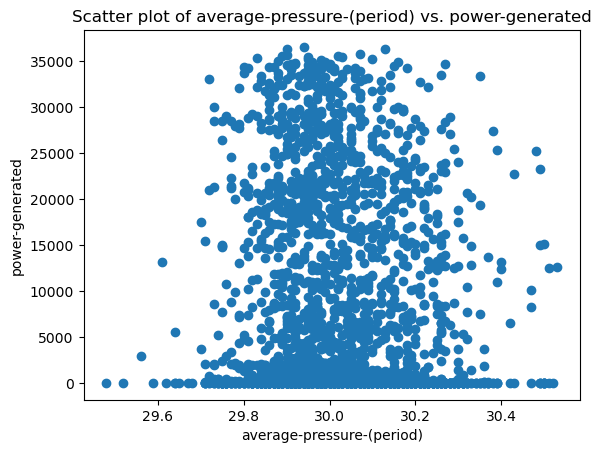

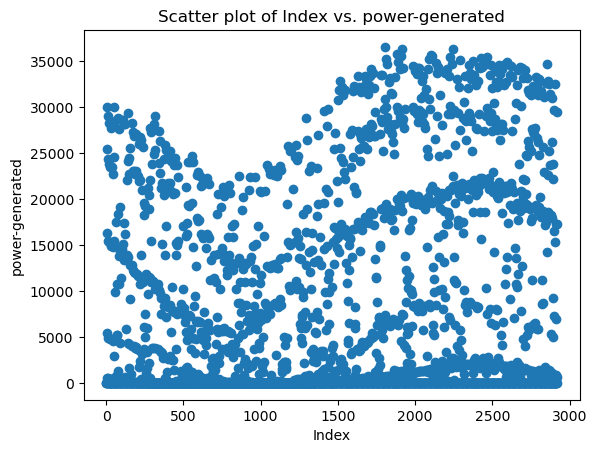

In [13]:
#scatter plot (except sky View)
for col in ['distance-to-solar-noon','temperature', 'wind-direction', 'wind-speed',
             'visibility', 'humidity', 'average-wind-speed-(period)',
            'average-pressure-(period)']:
    plt.figure()
    plt.scatter(df[col], df['power-generated'])
    plt.xlabel(col)
    plt.ylabel('power-generated')
    plt.title(f'Scatter plot of {col} vs. power-generated')
    plt.show()

plt.figure()
plt.scatter(df.index, df['power-generated'])
plt.xlabel('Index')
plt.ylabel('power-generated')
plt.title('Scatter plot of Index vs. power-generated')
plt.show()

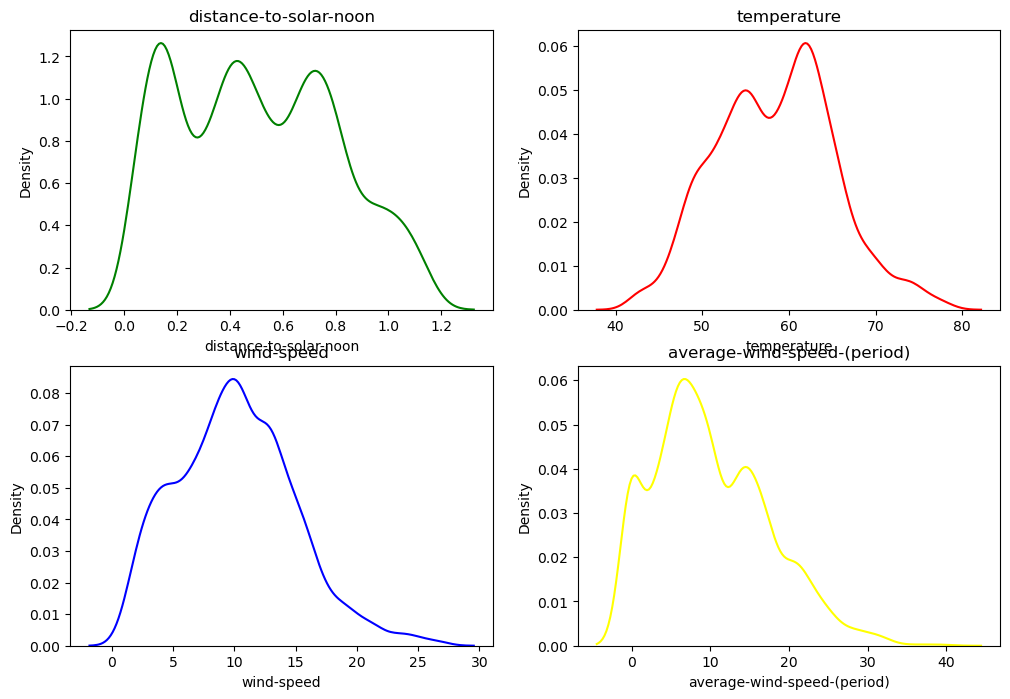

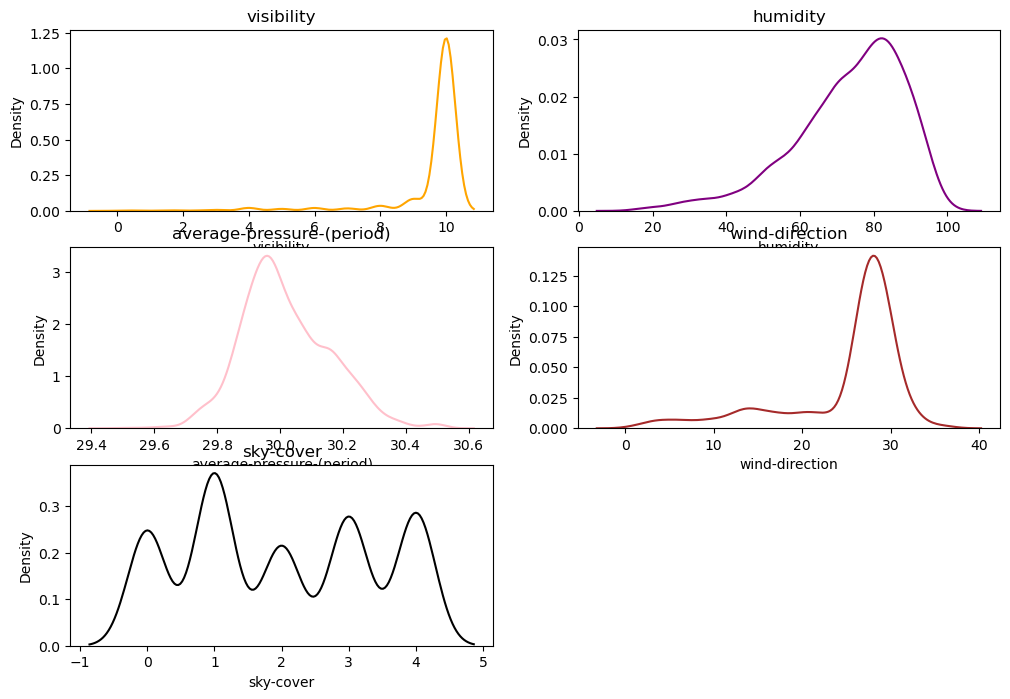

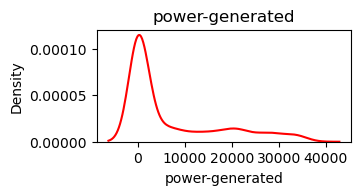

In [14]:
#KDE plot (smoothie version of histogram)

plt.figure(figsize=(12,8))
#plot2
plt.subplot(2,2,1)
sns.kdeplot(df['distance-to-solar-noon'], color='green')
plt.title('distance-to-solar-noon')

#plot2
plt.subplot(2,2,2)
sns.kdeplot(df['temperature'], color='red')
plt.title('temperature')
#plot3
plt.subplot(2,2,3)
sns.kdeplot(df['wind-speed'], color='blue')
plt.title('wind-speed')
#plot4
plt.subplot(2,2,4)
sns.kdeplot(df['average-wind-speed-(period)'], color='yellow')
plt.title('average-wind-speed-(period)')
plt.figure(figsize=(12,8))
#plot5
plt.subplot(3,2,1)
sns.kdeplot(df['visibility'], color='orange')
plt.title('visibility')
#plot6
plt.subplot(3,2,2)
sns.kdeplot(df['humidity'], color='purple')
plt.title('humidity')
#plot7
plt.subplot(3,2,3)
sns.kdeplot(df['average-pressure-(period)'], color='pink')
plt.title('average-pressure-(period)')
#plot8
plt.subplot(3,2,4)
sns.kdeplot(df['wind-direction'], color='brown')
plt.title('wind-direction')
#plot9
plt.subplot(3,2,5)
sns.kdeplot(df['sky-cover'], color='black')
plt.title('sky-cover')
plt.show()
#plot10
plt.subplot(3,2,6)
sns.kdeplot(df['power-generated'], color='red')
plt.title('power-generated')
plt.tight_layout()
plt.show()


In [15]:
df.kurt()

distance-to-solar-noon         -0.987306
temperature                    -0.287402
wind-direction                  1.856622
wind-speed                      0.078606
sky-cover                      -1.341456
visibility                     15.718494
humidity                        0.872219
average-wind-speed-(period)     0.016458
average-pressure-(period)       0.352309
power-generated                 0.342206
dtype: float64

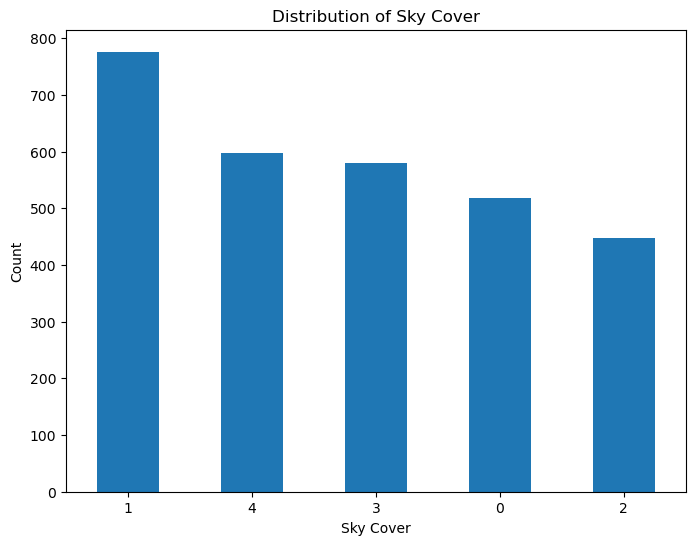

In [16]:
# Bar graph for sky view

sky_cover_counts = df['sky-cover'].value_counts()

plt.figure(figsize=(8, 6))
sky_cover_counts.plot(kind='bar')
plt.xlabel('Sky Cover')
plt.ylabel('Count')
plt.title('Distribution of Sky Cover')
plt.xticks(rotation=0)
plt.show()


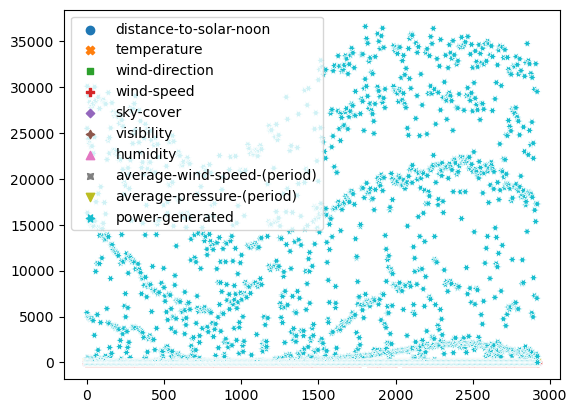

In [17]:
import seaborn as sns
sns.scatterplot(df)
plt.show()


Data Cleaning

In [18]:
# Replace outliers with the median
X = df.iloc[:, :-1]
Y = df.iloc[:, -1]
Q1 = X.quantile(0.25)
Q3 = X.quantile(0.75)
IQR = Q3 - Q1

def replace_outliers_with_median(df, column):
  median_value = df[column].median()
  lower_bound = Q1[column] - 1.5 * IQR[column]
  upper_bound = Q3[column] + 1.5 * IQR[column]
  df[column] = np.where((df[column] < lower_bound) | (df[column] > upper_bound), median_value, df[column])


for column in ['wind-direction', 'wind-speed', 'visibility', 
               'humidity', 'average-wind-speed-(period)', 'average-pressure-(period)']:
  replace_outliers_with_median(df, column)

df


distance-to-solar-noon  temperature  wind-direction  wind-speed  \
0                   0.859897           69            28.0         7.5   
1                   0.628535           69            28.0         7.5   
2                   0.397172           69            28.0         7.5   
3                   0.165810           69            28.0         7.5   
4                   0.065553           69            28.0         7.5   
...                      ...          ...             ...         ...   
2915                0.166453           63            27.0        13.9   
2916                0.064020           63            27.0        13.9   
2917                0.294494           63            27.0        13.9   
2918                0.524968           63            27.0        13.9   
2919                0.755442           63            27.0        13.9   

      sky-cover  visibility  humidity  average-wind-speed-(period)  \
0             0        10.0      75.0                          8.0   
1             0        10.0      77.0                          5.0   
2             0        10.0      70.0                          0.0   
3             0        10.0      77.0                          0.0   
4             0        10.0      77.0                          3.0   
...         ...         ...       ...                          ...   
2915          4        10.0      75.0                         10.0   
2916          1        10.0      66.0                         15.0   
2917          2        10.0      68.0                         21.0   
2918          2        10.0      81.0                         17.0   
2919          1        10.0      81.0                         11.0   

      average-pressure-(period)  power-generated  
0                         29.82                0  
1                         29.85                0  
2                         29.89             5418  
3                         29.91            25477  
4                         29.89            30069  
...                         ...              ...  
2915                      29.93             6995  
2916                      29.91            29490  
2917                      29.88            17257  
2918                      29.87              677  
2919                      29.90                0  

[2920 rows x 10 columns]

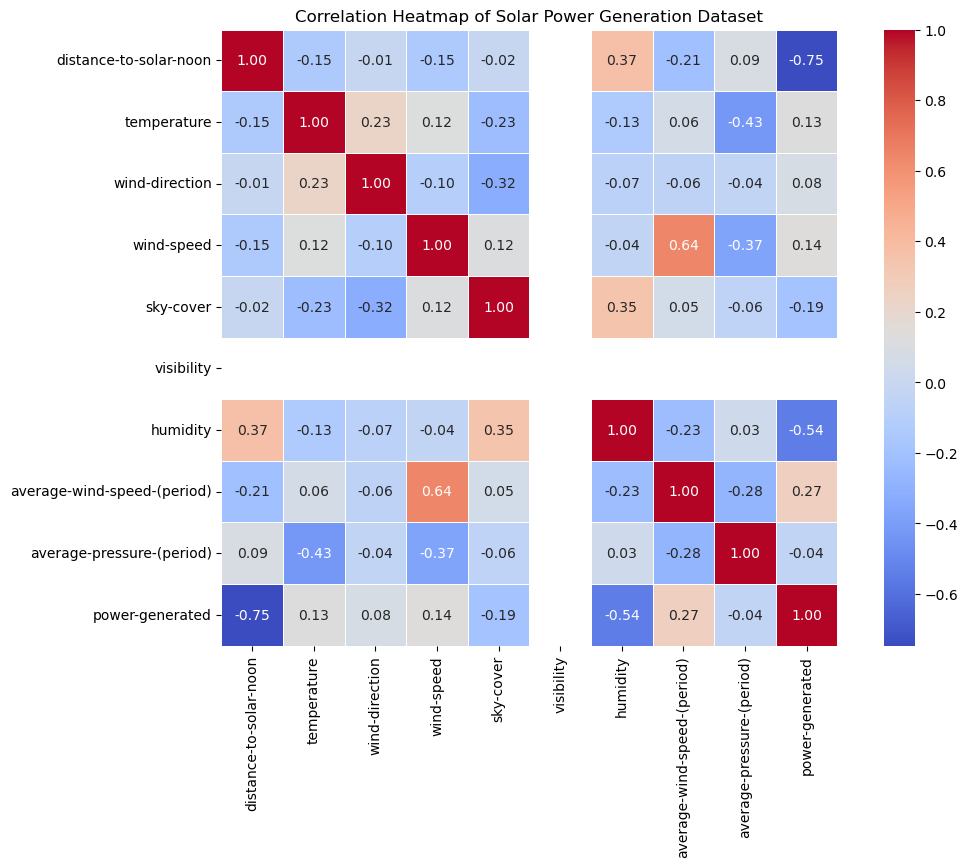

distance-to-solar-noon  temperature  \
distance-to-solar-noon                     1.000000    -0.145207   
temperature                               -0.145207     1.000000   
wind-direction                            -0.013684     0.227111   
wind-speed                                -0.146070     0.124745   
sky-cover                                 -0.015184    -0.230672   
visibility                                      NaN          NaN   
humidity                                   0.369278    -0.134182   
average-wind-speed-(period)               -0.209152     0.064373   
average-pressure-(period)                  0.089525    -0.432338   
power-generated                           -0.746681     0.132193   

                             wind-direction  wind-speed  sky-cover  \
distance-to-solar-noon            -0.013684   -0.146070  -0.015184   
temperature                        0.227111    0.124745  -0.230672   
wind-direction                     1.000000   -0.098751  -0.319133   
wind-speed                        -0.098751    1.000000   0.117157   
sky-cover                         -0.319133    0.117157   1.000000   
visibility                              NaN         NaN        NaN   
humidity                          -0.074539   -0.041484   0.351699   
average-wind-speed-(period)       -0.060734    0.638815   0.052744   
average-pressure-(period)         -0.043533   -0.365569  -0.056818   
power-generated                    0.079374    0.136162  -0.187236   

                             visibility  humidity  \
distance-to-solar-noon              NaN  0.369278   
temperature                         NaN -0.134182   
wind-direction                      NaN -0.074539   
wind-speed                          NaN -0.041484   
sky-cover                           NaN  0.351699   
visibility                          NaN       NaN   
humidity                            NaN  1.000000   
average-wind-speed-(period)         NaN -0.232395   
average-pressure-(period)           NaN  0.031645   
power-generated                     NaN -0.543508   

                             average-wind-speed-(period)  \
distance-to-solar-noon                         -0.209152   
temperature                                     0.064373   
wind-direction                                 -0.060734   
wind-speed                                      0.638815   
sky-cover                                       0.052744   
visibility                                           NaN   
humidity                                       -0.232395   
average-wind-speed-(period)                     1.000000   
average-pressure-(period)                      -0.281175   
power-generated                                 0.266865   

                             average-pressure-(period)  power-generated  
distance-to-solar-noon                        0.089525        -0.746681  
temperature                                  -0.432338         0.132193  
wind-direction                               -0.043533         0.079374  
wind-speed                                   -0.365569         0.136162  
sky-cover                                    -0.056818        -0.187236  
visibility                                         NaN              NaN  
humidity                                      0.031645        -0.543508  
average-wind-speed-(period)                  -0.281175         0.266865  
average-pressure-(period)                     1.000000        -0.041891  
power-generated                              -0.041891         1.000000

In [19]:
# Compute the correlation matrix
corr_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', cbar=True, square=True, linewidths=.5)
plt.title('Correlation Heatmap of Solar Power Generation Dataset')
plt.show()
corr_matrix

In [20]:
X=df.iloc[:,:9]
Y=df['power-generated']

In [21]:
# Standardize the data except distance-to-solar-noo,sky-cover ,and  target variable y power-generated save it df

from sklearn.preprocessing import StandardScaler

# Select columns to standardize (excluding 'distance-to-solar-noon', 'sky-cover', and 'power-generated')
columns_to_standardize = ['wind-direction','temperature', 'wind-speed', 'visibility', 'humidity',
                           'average-wind-speed-(period)', 'average-pressure-(period)']

# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler to the selected columns and transform them
df[columns_to_standardize] = scaler.fit_transform(df[columns_to_standardize])

df

distance-to-solar-noon  temperature  wind-direction  wind-speed  \
0                   0.859897     1.539688        0.167451   -0.529891   
1                   0.628535     1.539688        0.167451   -0.529891   
2                   0.397172     1.539688        0.167451   -0.529891   
3                   0.165810     1.539688        0.167451   -0.529891   
4                   0.065553     1.539688        0.167451   -0.529891   
...                      ...          ...             ...         ...   
2915                0.166453     0.662498       -0.266022    0.884766   
2916                0.064020     0.662498       -0.266022    0.884766   
2917                0.294494     0.662498       -0.266022    0.884766   
2918                0.524968     0.662498       -0.266022    0.884766   
2919                0.755442     0.662498       -0.266022    0.884766   

      sky-cover  visibility  humidity  average-wind-speed-(period)  \
0             0         0.0  0.008907                    -0.277261   
1             0         0.0  0.163257                    -0.709434   
2             0         0.0 -0.376969                    -1.429722   
3             0         0.0  0.163257                    -1.429722   
4             0         0.0  0.163257                    -0.997549   
...         ...         ...       ...                          ...   
2915          4         0.0  0.008907                     0.010854   
2916          1         0.0 -0.685669                     0.731141   
2917          2         0.0 -0.531319                     1.595487   
2918          2         0.0  0.471958                     1.019256   
2919          1         0.0  0.471958                     0.154911   

      average-pressure-(period)  power-generated  
0                     -1.453943                0  
1                     -1.229775                0  
2                     -0.930885             5418  
3                     -0.781440            25477  
4                     -0.930885            30069  
...                         ...              ...  
2915                  -0.631994             6995  
2916                  -0.781440            29490  
2917                  -1.005607            17257  
2918                  -1.080330              677  
2919                  -0.856162                0  

[2920 rows x 10 columns]

Data partition

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=42)
# Print the shapes of the training and testing sets
print("X_train shape:", X_train.shape)
print("Y_train shape:", Y_train.shape)
print("X_test shape:", X_test.shape)
print("Y_test shape:", Y_test.shape)


X_train shape: (2190, 9)
Y_train shape: (2190,)
X_test shape: (730, 9)
Y_test shape: (730,)


Model Building
LinearRegression

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# Initialize and train the Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train, Y_train)

# Predict on the training set and test set
Y_train_pred = linear_model.predict(X_train)
Y_test_pred = linear_model.predict(X_test)

# Calculate R² and RMSE for training set
r2_train = r2_score(Y_train, Y_train_pred)
rmse_train = np.sqrt(mean_squared_error(Y_train, Y_train_pred))

# Calculate R² and RMSE for test set
r2_test = r2_score(Y_test, Y_test_pred)
rmse_test = np.sqrt(mean_squared_error(Y_test, Y_test_pred))

# Print the results
print(f"Linear Regression Training R²: {r2_train}")
print(f"Linear Regression Training RMSE: {rmse_train}")
print(f"Linear Regression Test R²: {r2_test}")
print(f"Linear Regression Test RMSE: {rmse_test}")

Linear Regression Training R²: 0.6581171686431875
Linear Regression Training RMSE: 6031.617874769477
Linear Regression Test R²: 0.6575604457603766
Linear Regression Test RMSE: 6024.567098944068


Lasso Regression

In [24]:
from sklearn.linear_model import Lasso

# Initialize and train the Lasso Regression model
lasso_model = Lasso(alpha=1)
lasso_model.fit(X_train, Y_train)

# Predict on the training set and test set
Y_train_pred = lasso_model.predict(X_train)
Y_test_pred = lasso_model.predict(X_test)

# Calculate R² and RMSE for training set
r2_train = r2_score(Y_train, Y_train_pred)
rmse_train = np.sqrt(mean_squared_error(Y_train, Y_train_pred))

# Calculate R² and RMSE for test set
r2_test = r2_score(Y_test, Y_test_pred)
rmse_test = np.sqrt(mean_squared_error(Y_test, Y_test_pred))

# Print the results
print(f"Lasso Regression Training R²: {r2_train}")
print(f"Lasso Regression Training RMSE: {rmse_train}")
print(f"Lasso Regression Test R²: {r2_test}")
print(f"Lasso Regression Test RMSE: {rmse_test}")


Lasso Regression Training R²: 0.6581162971539435
Lasso Regression Training RMSE: 6031.625562325373
Lasso Regression Test R²: 0.6575589155340416
Lasso Regression Test RMSE: 6024.580559627594


Ridge Regression

In [25]:
from sklearn.linear_model import Ridge

# Initialize and train the Ridge Regression model
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, Y_train)

# Predict on the training set and test set
Y_train_pred = ridge_model.predict(X_train)
Y_test_pred = ridge_model.predict(X_test)

# Calculate R² and RMSE for training set
r2_train = r2_score(Y_train, Y_train_pred)
rmse_train = np.sqrt(mean_squared_error(Y_train, Y_train_pred))

# Calculate R² and RMSE for test set
r2_test = r2_score(Y_test, Y_test_pred)
rmse_test = np.sqrt(mean_squared_error(Y_test, Y_test_pred))

# Print the results
print(f"Ridge Regression Training R²: {r2_train}")
print(f"Ridge Regression Training RMSE: {rmse_train}")
print(f"Ridge Regression Test R²: {r2_test}")
print(f"Ridge Regression Test RMSE: {rmse_test}")


Ridge Regression Training R²: 0.6581028908114748
Ridge Regression Training RMSE: 6031.743820733947
Ridge Regression Test R²: 0.6575121916414459
Ridge Regression Test RMSE: 6024.991553323278


SVR

In [26]:
from sklearn.svm import SVR

# Initialize and train the SVR model with RBF kernel
svr_rbf_model = SVR(kernel='rbf',C=900)
svr_rbf_model.fit(X_train, Y_train)

# Predict on the training set and test set
Y_train_pred = svr_rbf_model.predict(X_train)
Y_test_pred = svr_rbf_model.predict(X_test)

# Calculate R² and RMSE for training set
r2_train = r2_score(Y_train, Y_train_pred)
rmse_train = np.sqrt(mean_squared_error(Y_train, Y_train_pred))

# Calculate R² and RMSE for test set
r2_test = r2_score(Y_test, Y_test_pred)
rmse_test = np.sqrt(mean_squared_error(Y_test, Y_test_pred))

# Print the results
print(f"SVR (RBF Kernel) Training R²: {r2_train}")
print(f"SVR (RBF Kernel) Training RMSE: {rmse_train}")
print(f"SVR (RBF Kernel) Test R²: {r2_test}")
print(f"SVR (RBF Kernel) Test RMSE: {rmse_test}")


SVR (RBF Kernel) Training R²: 0.2499365323071806
SVR (RBF Kernel) Training RMSE: 8933.963633070245
SVR (RBF Kernel) Test R²: 0.27475445679425514
SVR (RBF Kernel) Test RMSE: 8767.5130003487


DecisionTreeRegressor

In [27]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# Initialize the Decision Tree model
dt_model = DecisionTreeRegressor(random_state=42)

# Define the parameter grid
param_grid_dt = {
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [8,9]
}

# Initialize Grid Search with cross-validation
grid_search_dt = GridSearchCV(estimator=dt_model, param_grid=param_grid_dt, cv=5, n_jobs=-1, scoring='r2')

# Fit Grid Search to the training data
grid_search_dt.fit(X_train, Y_train)

# Print the best parameters and the best score
print("Best parameters found for Decision Tree: ", grid_search_dt.best_params_)
print("Best R² score for Decision Tree: ", grid_search_dt.best_score_)

# Use the best estimator to make predictions
best_dt_model = grid_search_dt.best_estimator_

# Predict on the training set and test set
Y_train_pred_dt = best_dt_model.predict(X_train)
Y_test_pred_dt = best_dt_model.predict(X_test)

# Calculate R² and RMSE for training set
r2_train_dt = r2_score(Y_train, Y_train_pred_dt)
rmse_train_dt = np.sqrt(mean_squared_error(Y_train, Y_train_pred_dt))

# Calculate R² and RMSE for test set
r2_test_dt = r2_score(Y_test, Y_test_pred_dt)
rmse_test_dt = np.sqrt(mean_squared_error(Y_test, Y_test_pred_dt))

# Print the results
print(f"Decision Tree with Grid Search Training R²: {r2_train_dt}")
print(f"Decision Tree with Grid Search Training RMSE: {rmse_train_dt}")
print(f"Decision Tree with Grid Search Test R²: {r2_test_dt}")
print(f"Decision Tree with Grid Search Test RMSE: {rmse_test_dt}")


Best parameters found for Decision Tree:  {'max_depth': 10, 'max_features': 8, 'min_samples_leaf': 4, 'min_samples_split': 10}
Best R² score for Decision Tree:  0.8804045491797237
Decision Tree with Grid Search Training R²: 0.9557344006279052
Decision Tree with Grid Search Training RMSE: 2170.3428658930584
Decision Tree with Grid Search Test R²: 0.8389061851613075
Decision Tree with Grid Search Test RMSE: 4132.123729359212


Random Forest Regressor

In [29]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the Random Forest model
rf_model = RandomForestRegressor(random_state=42)

# Define the parameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [8,9]
}

# Initialize Grid Search with Random Forest
grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid_rf, cv=5, n_jobs=-1, scoring='r2')

# Fit Grid Search to the training data
grid_search_rf.fit(X_train, Y_train)

# Print the best parameters and the best score
print("Best parameters found for Random Forest: ", grid_search_rf.best_params_)
print("Best R² score for Random Forest: ", grid_search_rf.best_score_)

# Use the best estimator to make predictions
best_rf_model = grid_search_rf.best_estimator_

# Predict on the training set and test set
Y_train_pred_rf = best_rf_model.predict(X_train)
Y_test_pred_rf = best_rf_model.predict(X_test)

# Calculate R² and RMSE for training set
r2_train_rf = r2_score(Y_train, Y_train_pred_rf)
rmse_train_rf = np.sqrt(mean_squared_error(Y_train, Y_train_pred_rf))

# Calculate R² and RMSE for test set
r2_test_rf = r2_score(Y_test, Y_test_pred_rf)
rmse_test_rf = np.sqrt(mean_squared_error(Y_test, Y_test_pred_rf))

# Print the results
print(f"Random Forest with Grid Search Training R²: {r2_train_rf}")
print(f"Random Forest with Grid Search Training RMSE: {rmse_train_rf}")
print(f"Random Forest with Grid Search Test R²: {r2_test_rf}")
print(f"Random Forest with Grid Search Test RMSE: {rmse_test_rf}")


Best parameters found for Random Forest:  {'max_depth': 20, 'max_features': 8, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 300}
Best R² score for Random Forest:  0.9145743290991499
Random Forest with Grid Search Training R²: 0.9798447754965398
Random Forest with Grid Search Training RMSE: 1464.4987103935157
Random Forest with Grid Search Test R²: 0.890461669934497
Random Forest with Grid Search Test RMSE: 3407.3515366327993


AdaBoostRegressor

In [30]:
from sklearn.ensemble import AdaBoostRegressor

# Initialize the AdaBoost model
ada_model = AdaBoostRegressor(random_state=42)

# Define the parameter grid for AdaBoost
param_grid_ada = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1.0]
}

# Initialize Grid Search with cross-validation for AdaBoost
grid_search_ada = GridSearchCV(estimator=ada_model, param_grid=param_grid_ada, cv=5, n_jobs=-1, scoring='r2')

# Fit Grid Search to the training data
grid_search_ada.fit(X_train, Y_train)

# Print the best parameters and the best score
print("Best parameters found for AdaBoost: ", grid_search_ada.best_params_)
print("Best R² score for AdaBoost: ", grid_search_ada.best_score_)

# Use the best estimator to make predictions
best_ada_model = grid_search_ada.best_estimator_

# Predict on the training set and test set
Y_train_pred_ada = best_ada_model.predict(X_train)
Y_test_pred_ada = best_ada_model.predict(X_test)

# Calculate R² and RMSE for training set
r2_train_ada = r2_score(Y_train, Y_train_pred_ada)
rmse_train_ada = np.sqrt(mean_squared_error(Y_train, Y_train_pred_ada))

# Calculate R² and RMSE for test set
r2_test_ada = r2_score(Y_test, Y_test_pred_ada)
rmse_test_ada = np.sqrt(mean_squared_error(Y_test, Y_test_pred_ada))

# Print the results
print(f"AdaBoost with Grid Search Training R²: {r2_train_ada}")
print(f"AdaBoost with Grid Search Training RMSE: {rmse_train_ada}")
print(f"AdaBoost with Grid Search Test R²: {r2_test_ada}")
print(f"AdaBoost with Grid Search Test RMSE: {rmse_test_ada}")


Best parameters found for AdaBoost:  {'learning_rate': 0.01, 'n_estimators': 100}
Best R² score for AdaBoost:  0.8696729846525842
AdaBoost with Grid Search Training R²: 0.8745283950185124
AdaBoost with Grid Search Training RMSE: 3653.994592072224
AdaBoost with Grid Search Test R²: 0.8434947863156876
AdaBoost with Grid Search Test RMSE: 4072.84881347284


XGBRegRessor

In [31]:
import xgboost as xgb

# Initialize the XGBoost model
xgb_model = xgb.XGBRegressor(random_state=42)

# Define the parameter grid for XGBoost
param_grid_xgb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 6, 9],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 0.9],
    'gamma': [0, 0.1, 0.2]
}

# Initialize Grid Search with cross-validation for XGBoost
grid_search_xgb = GridSearchCV(estimator=xgb_model, param_grid=param_grid_xgb, cv=5, n_jobs=-1, scoring='r2')

# Fit Grid Search to the training data
grid_search_xgb.fit(X_train, Y_train)

# Print the best parameters and the best score
print("Best parameters found for XGBoost: ", grid_search_xgb.best_params_)
print("Best R² score for XGBoost: ", grid_search_xgb.best_score_)

# Use the best estimator to make predictions
best_xgb_model = grid_search_xgb.best_estimator_

# Predict on the training set and test set
Y_train_pred_xgb = best_xgb_model.predict(X_train)
Y_test_pred_xgb = best_xgb_model.predict(X_test)

# Calculate R² and RMSE for training set
r2_train_xgb = r2_score(Y_train, Y_train_pred_xgb)
rmse_train_xgb = np.sqrt(mean_squared_error(Y_train, Y_train_pred_xgb))

# Calculate R² and RMSE for test set
r2_test_xgb = r2_score(Y_test, Y_test_pred_xgb)
rmse_test_xgb = np.sqrt(mean_squared_error(Y_test, Y_test_pred_xgb))

# Print the results
print(f"XGBoost with Grid Search Training R²: {r2_train_xgb}")
print(f"AdaBoost with Grid Search Training RMSE: {rmse_train_ada}")
print(f"AdaBoost with Grid Search Test R²: {r2_test_ada}")
print(f"AdaBoost with Grid Search Test RMSE: {rmse_test_ada}")


Best parameters found for XGBoost:  {'colsample_bytree': 0.8, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.8}
Best R² score for XGBoost:  0.9108669899549977
XGBoost with Grid Search Training R²: 0.9408881631599155
AdaBoost with Grid Search Training RMSE: 3653.994592072224
AdaBoost with Grid Search Test R²: 0.8434947863156876
AdaBoost with Grid Search Test RMSE: 4072.84881347284


Cross-validation

In [32]:
from xgboost import XGBRegressor

# Define the models
models = {
    'Linear Regression': LinearRegression(),
    'Lasso Regression': Lasso(alpha=0.1),
    'Ridge Regression': Ridge(alpha=1.0),
    'SVR (RBF Kernel)': SVR(kernel='rbf'),
    'Decision Tree': DecisionTreeRegressor(random_state=42,**grid_search_dt.best_params_),
    'Random Forest': RandomForestRegressor(random_state=42, **grid_search_rf.best_params_),
    'AdaBoost': AdaBoostRegressor(random_state=42, **grid_search_ada.best_params_),
    'XGBoost': XGBRegressor(random_state=42, **grid_search_xgb.best_params_)
}

# Function to calculate RMSE and R2
def evaluate_model(model, X_train, X_test, Y_train, Y_test):
    model.fit(X_train, Y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    rmse_train = np.sqrt(mean_squared_error(Y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(Y_test, y_test_pred))
    r2_train = r2_score(Y_train, y_train_pred)
    r2_test = r2_score(Y_test, y_test_pred)
    return rmse_train, rmse_test, r2_train, r2_test

# Evaluate each model
results = {}
for name, model in models.items():
    rmse_train, rmse_test, r2_train, r2_test = evaluate_model(model, X_train, X_test, Y_train, Y_test)
    results[name] = {
        'RMSE Train': rmse_train,
        'RMSE Test': rmse_test,
        'R² Train': r2_train,
        'R² Test': r2_test
    }

# Create a DataFrame to display the results
results_df = pd.DataFrame(results).T
print(results_df)

                     RMSE Train     RMSE Test  R² Train   R² Test
Linear Regression   6031.617875   6024.567099  0.658117  0.657560
Lasso Regression    6031.617952   6024.567782  0.658117  0.657560
Ridge Regression    6031.743821   6024.991553  0.658103  0.657512
SVR (RBF Kernel)   12213.293893  12237.121273 -0.401765 -0.412833
Decision Tree       2170.342866   4132.123729  0.955734  0.838906
Random Forest       1464.498710   3407.351537  0.979845  0.890462
AdaBoost            3653.994592   4072.848813  0.874528  0.843495
XGBoost             2508.028117   3369.787523  0.940888  0.892864


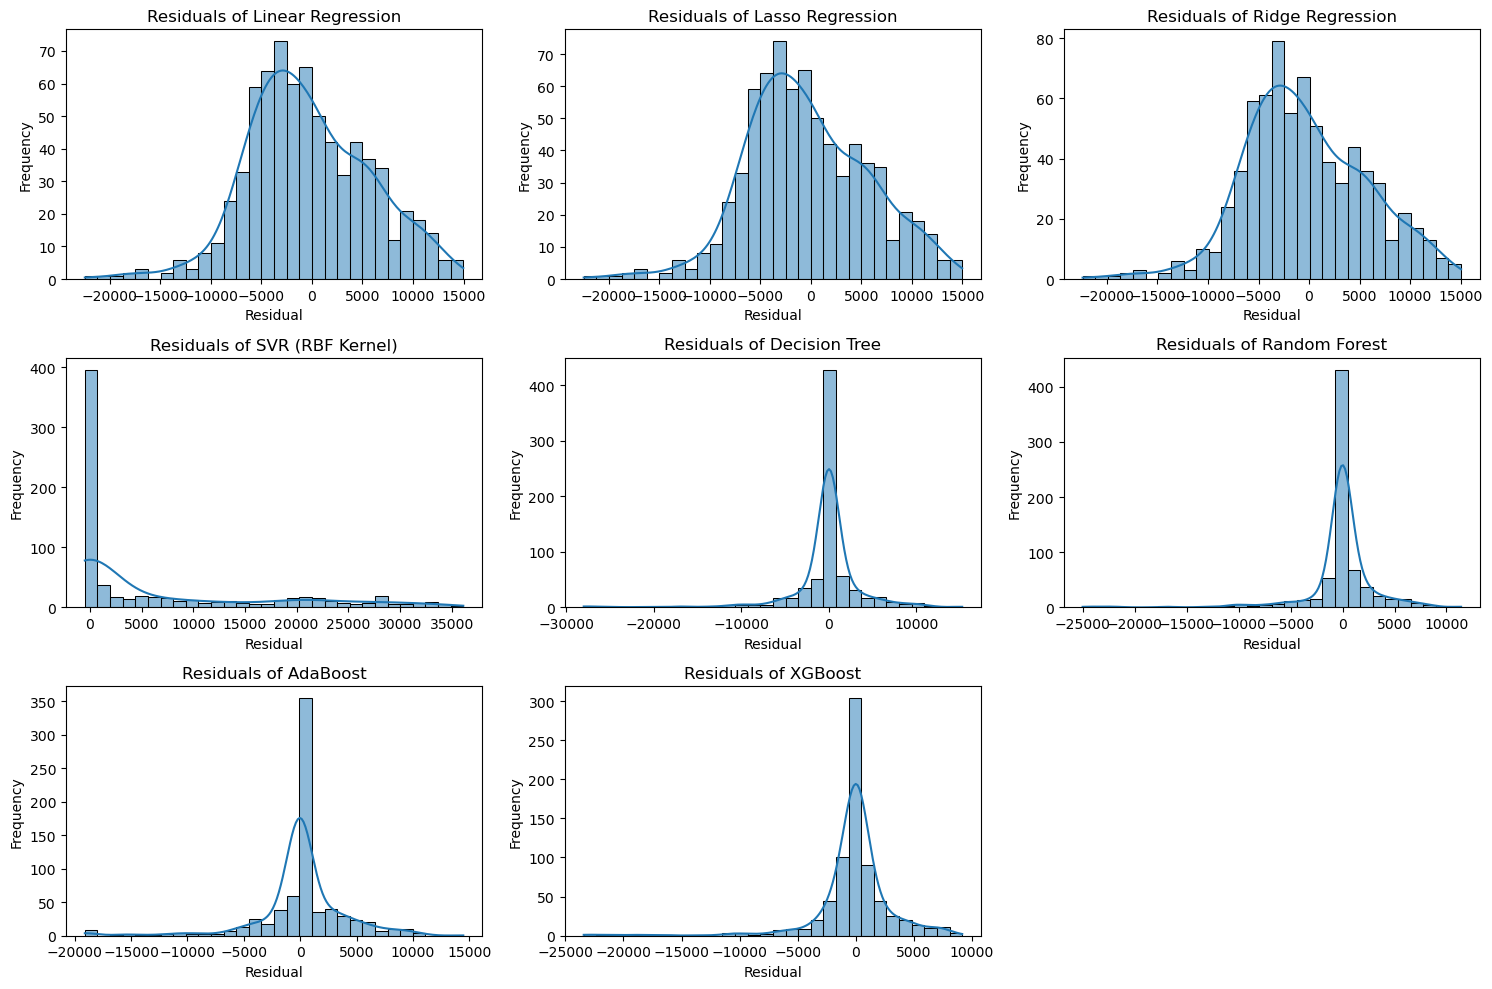

In [33]:
# Fit models, predict, and calculate residuals
residuals = {}

for name, model in models.items():
    model.fit(X_train, Y_train)
    y_pred_train=model.predict(X_train)
    residuals[name]=Y_train- y_pred_train
    y_pred = model.predict(X_test)
    residuals[name] = Y_test - y_pred

# Plot histograms of residuals
plt.figure(figsize=(15, 10))

for i, (name, resid) in enumerate(residuals.items(), 1):
    plt.subplot(3, 3, i)
    sns.histplot(resid, bins=30, kde=True)
    plt.title(f'Residuals of {name}')
    plt.xlabel('Residual')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

Model Evaluation

In [35]:
rmse_train=[]
rmse_test=[]
r2_train=[]
r2_test=[]

for i in range(1,100,1):
    X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=i)
    xgb_model = xgb.XGBRegressor(random_state=42, **grid_search_xgb.best_params_)
    xgb_model.fit(X_train,Y_train)
    ypred_train_xg=xgb_model.predict(X_train)
    ypred_tes_xg=xgb_model.predict(X_test)
    rmse_train.append(np.sqrt(mean_squared_error(Y_train, ypred_train_xg)))
    rmse_test.append(np.sqrt(mean_squared_error(Y_test, ypred_tes_xg)))
    r2_train.append(r2_score(Y_train, ypred_train_xg))
    r2_test.append(r2_score(Y_test, ypred_tes_xg))
    
print('XGBoost cross validation results')
print('Train RMSE:',np.mean(rmse_train))
print('Test RMSE:',np.mean(rmse_test))
print("Train R2:",np.mean(r2_train))
print("Test R2:",np.mean(r2_test))

XGBoost cross validation results
Train RMSE: 2569.790694769816
Test RMSE: 3097.2091070080987
Train R2: 0.937813030002951
Test R2: 0.9091194618631204


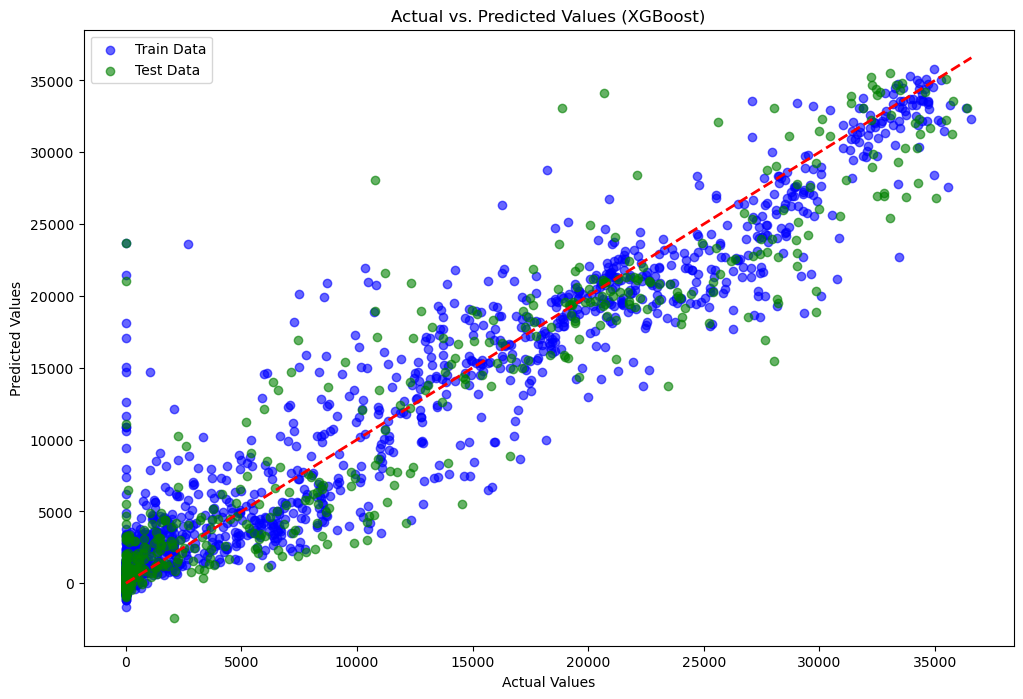

In [36]:
# Create scatter plots for actual vs predicted values
plt.figure(figsize=(12, 8))
plt.scatter(Y_train, ypred_train_xg, color='blue', alpha=0.6, label='Train Data')
plt.scatter(Y_test, ypred_tes_xg, color='green', alpha=0.6, label='Test Data')
plt.plot([Y.min(), Y.max()], [Y.min(), Y.max()], 'r--', lw=2)  # Diagonal line
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values (XGBoost)')
plt.legend()
plt.show()